<a href="https://colab.research.google.com/github/iamandamedeiros/analise-de-dados/blob/main/Trabalho2_AnalisedeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Análise de Dados
Grupo: Amanda Medeiros e Josemberg Cordeiro

Dataset selecionado:

 Censo da Educação Superior

 Organização: Instituto Nacional de Estudos e Pesquisas Educacionais (Inep)

 https://basedosdados.org/dataset/a3b57cca-ff80-4bf2-8bac-c145109e06a7?table=e8ee3373-0f3d-4617-849c-c730970a819e

## Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Carregando o Dataset

In [ ]:
df = pd.read_csv('/content/br_inep_censo_educacao_superior_ies.csv')

print('Dataset carregado!')

df

Dataset carregado!


,ano,sigla_uf,id_municipio,tipo_organizacao_academica,tipo_categoria_administrativa,nome_mantenedora,id_mantenedora,id_ies,nome,sigla,...,quantidade_docentes_exercicio_60_mais,quantidade_docentes_exercicio_branca,quantidade_docentes_exercicio_preta,quantidade_docentes_exercicio_parda,quantidade_docentes_exercicio_amarela,quantidade_docentes_exercicio_indigena,quantidade_docentes_exercicio_cor_nao_declarada,quantidade_docentes_exercicio_brasileiro,quantidade_docentes_exercicio_estrangeiro,quantidade_docentes_exercicio_deficiencia
0,2023,TO,1718204,3,4,M A TELES SANTOS LTDA,17823,2137,FACULDADE SÃO MARCOS,FASAMAR,...,0.0,4.0,0.0,2.0,0.0,0.0,2.0,8.0,0.0,0.0
1,2023,TO,1705508,3,4,UNIESP S.A,16134,1835,Faculdade de Colinas do Tocantins,NaN,...,0.0,6.0,0.0,3.0,0.0,0.0,4.0,13.0,0.0,0.0
2,2023,TO,1716109,3,4,UNEST - UNIAO EDUCACIONAL DE ENSINO SUPERIOR D...,1546,2702,FACULDADE DE CIÊNCIAS JURÍDICAS DE PARAÍSO DO ...,FCJP,...,0.0,5.0,2.0,10.0,0.0,0.0,0.0,16.0,1.0,0.0
3,2023,TO,1721000,3,4,INSTITUTO TOCANTINENSE DE EDUCACAO SUPERIOR E ...,3172,21892,CENTRO DE ENSINO SUPERIOR DE PALMAS,CESUP,...,0.0,14.0,1.0,14.0,0.0,0.0,4.0,32.0,1.0,0.0
4,2023,TO,1721000,3,4,EDITORA E DISTRIBUIDORA EDUCACIONAL S/A,14514,23099,Faculdade Anhanguera de Palmas,NaN,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18814,2010,SP,3550308,3,5,CETTAA - CENTRO DE EDUCAÇÃO TÉCNICA E TECNOLÓG...,2744,4357,FACULDADE DE TECNOLOGIA ÁLVARES DE AZEVEDO,FAATESP,...,0.0,27.0,3.0,0.0,3.0,0.0,2.0,37.0,0.0,0.0
18815,2010,SP,3550308,3,4,ETAPA EDUCACIONAL LTDA,2577,4104,ESCOLA SUPERIOR DE ENGENHARIA E GESTÃO DE SÃO ...,ESEG,...,4.0,43.0,0.0,2.0,7.0,0.0,0.0,54.0,0.0,1.0
18816,2010,SP,3550308,3,4,Sociedade Interlagos de Educação e Cultura S/S...,651,924,FACULDADE INTERLAGOS DE EDUCAÇÃO E CULTURA,FINTEC,...,4.0,36.0,1.0,1.0,1.0,0.0,4.0,53.0,0.0,0.0
18817,2010,SP,3550308,3,5,CONSELHO BATISTA DE ADMINISTRAÇÃO TEOLÓGICA E ...,2379,3770,FACULDADE TEOLÓGICA BATISTA DE SÃO PAULO,FTBSP,...,7.0,24.0,1.0,2.0,1.0,0.0,0.0,27.0,1.0,0.0


Visualizando um resumo das colunas e os tipos de dados do dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 71 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   ano                                                             18819 non-null  int64  
 1   sigla_uf                                                        18819 non-null  object 
 2   id_municipio                                                    18819 non-null  int64  
 3   tipo_organizacao_academica                                      18819 non-null  int64  
 4   tipo_categoria_administrativa                                   18819 non-null  int64  
 5   nome_mantenedora                                                18819 non-null  object 
 6   id_mantenedora                                                  18819 non-null  int64  
 7   id_ies                                           

Análise estatística completa do dataset

In [ ]:
print('Estatísticas descritivas gerais do dataset:')
print(df.describe())

print('Verificando valores nulos:')
print(df.isnull().sum())

print('Contagem de valores únicos por coluna:')
print(df.nunique())

Estatísticas descritivas gerais do dataset:
                ano  id_municipio  tipo_organizacao_academica  \
count  18819.000000  1.881900e+04                18819.000000   
mean    2015.324831  3.397855e+06                    2.764865   
std        5.272968  9.379044e+05                    0.615997   
min     2009.000000  1.100023e+06                    1.000000   
25%     2011.000000  2.927408e+06                    3.000000   
50%     2013.000000  3.502804e+06                    3.000000   
75%     2022.000000  4.106902e+06                    3.000000   
max     2023.000000  5.300108e+06                    5.000000   

       tipo_categoria_administrativa  id_mantenedora        id_ies  \
count                   18819.000000    18819.000000  18819.000000   
mean                        4.375897     3817.010362   5171.650460   
std                         1.256314     5657.572606   6575.202375   
min                         1.000000        1.000000      1.000000   
25%                 

### Selecionando os dados da UFPI

In [ ]:
df_ufpi = df[df['id_ies'] == 5].sort_values(by='ano', ascending=True)

df_ufpi

,ano,sigla_uf,id_municipio,tipo_organizacao_academica,tipo_categoria_administrativa,nome_mantenedora,id_mantenedora,id_ies,nome,sigla,...,quantidade_docentes_exercicio_60_mais,quantidade_docentes_exercicio_branca,quantidade_docentes_exercicio_preta,quantidade_docentes_exercicio_parda,quantidade_docentes_exercicio_amarela,quantidade_docentes_exercicio_indigena,quantidade_docentes_exercicio_cor_nao_declarada,quantidade_docentes_exercicio_brasileiro,quantidade_docentes_exercicio_estrangeiro,quantidade_docentes_exercicio_deficiencia
10148,2009,PI,2211001,1,1,MINISTERIO DA EDUCACAO,391,5,UNIVERSIDADE FEDERAL DO PIAUI,UFPI,...,110.0,11.0,1.0,10.0,1.0,0.0,224.0,1271.0,0.0,0.0
17465,2010,PI,2211001,1,1,MINISTÉRIO DA EDUCAÇÃO,391,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,150.0,2.0,0.0,4.0,0.0,0.0,1588.0,1594.0,0.0,0.0
5242,2011,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,214.0,2.0,0.0,1.0,0.0,0.0,1579.0,1591.0,0.0,0.0
290,2012,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,189.0,13.0,4.0,8.0,0.0,0.0,1320.0,1581.0,0.0,0.0
15122,2013,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,186.0,41.0,7.0,120.0,3.0,0.0,37.0,1507.0,1.0,1.0
14313,2019,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,226.0,128.0,48.0,249.0,1.0,1.0,1302.0,1729.0,0.0,0.0
3163,2022,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,239.0,133.0,44.0,232.0,1.0,2.0,1070.0,1482.0,0.0,0.0
9419,2023,PI,2211001,1,1,FUNDACAO UNIVERSIDADE FEDERAL DO PIAUI,14054,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,...,243.0,164.0,41.0,257.0,3.0,1.0,1003.0,1469.0,0.0,0.0


In [ ]:
df_ufpi.info()

print('Estatísticas descritivas para UFPI:')
print(df_ufpi.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 10148 to 9419
Data columns (total 71 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   ano                                                             8 non-null      int64  
 1   sigla_uf                                                        8 non-null      object 
 2   id_municipio                                                    8 non-null      int64  
 3   tipo_organizacao_academica                                      8 non-null      int64  
 4   tipo_categoria_administrativa                                   8 non-null      int64  
 5   nome_mantenedora                                                8 non-null      object 
 6   id_mantenedora                                                  8 non-null      int64  
 7   id_ies                                                 

## Análise dos Técnicos

### Selecionando os dados dos técnicos da UFPI

In [ ]:
ufpi_tecnicos = df_ufpi[['ano',
'quantidade_tecnicos',
'quantidade_tecnicos_ef_incompleto_feminino',
'quantidade_tecnicos_ef_incompleto_masculino',
'quantidade_tecnicos_ef_completo_feminino',
'quantidade_tecnicos_ef_completo_masculino',
'quantidade_tecnicos_em_feminino',
'quantidade_tecnicos_em_masculino',
'quantidade_tecnicos_es_feminino',
'quantidade_tecnicos_es_masculino',
'quantidade_tecnicos_especializacao_feminino',
'quantidade_tecnicos_especializacao_masculino',
'quantidade_tecnicos_mestrado_feminino',
'quantidade_tecnicos_mestrado_masculino',
'quantidade_tecnicos_doutorado_feminino',
'quantidade_tecnicos_doutorado_masculino']]

ufpi_tecnicos

,ano,quantidade_tecnicos,quantidade_tecnicos_ef_incompleto_feminino,quantidade_tecnicos_ef_incompleto_masculino,quantidade_tecnicos_ef_completo_feminino,quantidade_tecnicos_ef_completo_masculino,quantidade_tecnicos_em_feminino,quantidade_tecnicos_em_masculino,quantidade_tecnicos_es_feminino,quantidade_tecnicos_es_masculino,quantidade_tecnicos_especializacao_feminino,quantidade_tecnicos_especializacao_masculino,quantidade_tecnicos_mestrado_feminino,quantidade_tecnicos_mestrado_masculino,quantidade_tecnicos_doutorado_feminino,quantidade_tecnicos_doutorado_masculino
10148,2009,1146,16,84,11,64,187,244,205,217,59,47,6,6,0,0
17465,2010,1131,14,78,9,62,172,239,81,117,184,140,15,15,1,4
5242,2011,1109,13,75,8,58,139,211,175,203,119,84,10,8,1,5
290,2012,1083,11,72,8,50,129,194,149,164,147,124,13,15,1,6
15122,2013,1046,10,69,5,45,103,182,142,143,165,141,16,18,2,5
14313,2019,1189,3,15,0,6,44,101,131,141,257,229,117,93,23,29
3163,2022,1095,3,19,1,15,27,68,105,113,244,213,126,94,36,31
9419,2023,2243,128,223,58,82,340,508,51,71,258,211,135,99,44,35


### Análise do total de técnicos no período

        ano  quantidade_tecnicos  variacao_percentual
10148  2009                 1146                  NaN
17465  2010                 1131            -1.308901
5242   2011                 1109            -1.945181
290    2012                 1083            -2.344454
15122  2013                 1046            -3.416436
14313  2019                 1189            13.671128
3163   2022                 1095            -7.905803
9419   2023                 2243           104.840183

Quantidade total de técnicos por ano:
    ano  quantidade_tecnicos
0  2009               353775
1  2010               287995
2  2011               373258
3  2012               386533
4  2013               394416
5  2019               379137
6  2022               356926
7  2023               362555


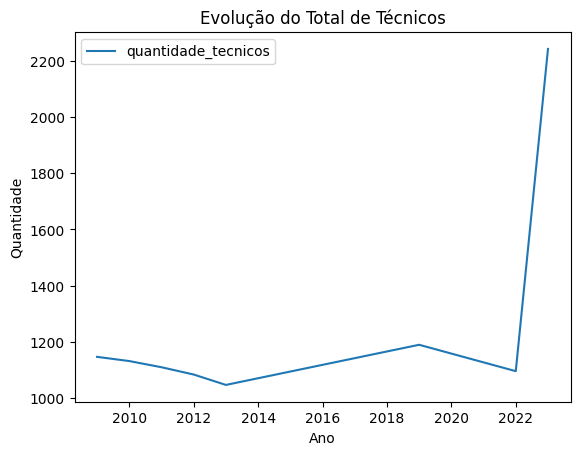

In [ ]:
ufpi_tecnicos['variacao_percentual'] = ufpi_tecnicos['quantidade_tecnicos'].pct_change() * 100
print(ufpi_tecnicos[['ano','quantidade_tecnicos', 'variacao_percentual']])

ufpi_tecnicos.plot(x='ano', y='quantidade_tecnicos', kind='line', title='Evolução do Total de Técnicos', xlabel='Ano', ylabel='Quantidade')

tecnicos_por_ano = df.groupby('ano')['quantidade_tecnicos'].sum().reset_index()
print("\nQuantidade total de técnicos por ano:")
print(tecnicos_por_ano)

In [ ]:
max_tecnicos = ufpi_tecnicos.loc[ufpi_tecnicos['quantidade_tecnicos'].idxmax(), ['ano', 'quantidade_tecnicos']]
min_tecnicos = ufpi_tecnicos.loc[ufpi_tecnicos['quantidade_tecnicos'].idxmin(), ['ano', 'quantidade_tecnicos']]

print(f"Ano com mais técnicos: {max_tecnicos['ano']} com {max_tecnicos['quantidade_tecnicos']} técnicos.")
print(f"Ano com menos técnicos: {min_tecnicos['ano']} com {min_tecnicos['quantidade_tecnicos']} técnicos.")

Ano com mais técnicos: 2023.0 com 2243.0 técnicos.
Ano com menos técnicos: 2013.0 com 1046.0 técnicos.


In [ ]:
media_tecnicos = ufpi_tecnicos['quantidade_tecnicos'].mean()
mediana_tecnicos = ufpi_tecnicos['quantidade_tecnicos'].median()
desvio_tecnicos = ufpi_tecnicos['quantidade_tecnicos'].std()

print(f"Média de técnicos: {media_tecnicos:.2f}")
print(f"Mediana de técnicos: {mediana_tecnicos}")
print(f"Desvio padrão do número de técnicos: {desvio_tecnicos:.2f}")

Média de técnicos: 1255.25
Mediana de técnicos: 1120.0
Desvio padrão do número de técnicos: 401.41


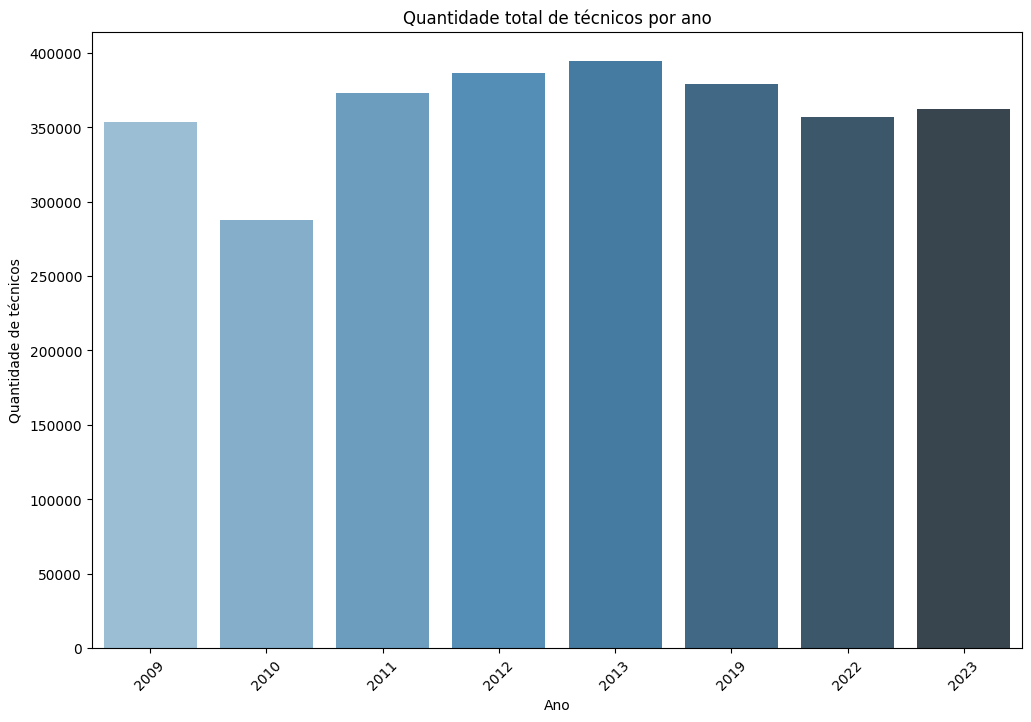

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=tecnicos_por_ano, x='ano', y='quantidade_tecnicos', palette='Blues_d')
plt.title('Quantidade total de técnicos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de técnicos')
plt.xticks(rotation=45)
plt.show()

### Análise de técnicos por nível de escolaridade

quantidade_tecnicos_ef_incompleto_feminino       198
quantidade_tecnicos_ef_incompleto_masculino      635
quantidade_tecnicos_ef_completo_feminino         100
quantidade_tecnicos_ef_completo_masculino        382
quantidade_tecnicos_em_feminino                 1141
quantidade_tecnicos_em_masculino                1747
quantidade_tecnicos_es_feminino                 1039
quantidade_tecnicos_es_masculino                1169
quantidade_tecnicos_especializacao_feminino     1433
quantidade_tecnicos_especializacao_masculino    1189
quantidade_tecnicos_mestrado_feminino            438
quantidade_tecnicos_mestrado_masculino           348
quantidade_tecnicos_doutorado_feminino           108
quantidade_tecnicos_doutorado_masculino          115
dtype: int64


<Axes: title={'center': 'Distribuição por Nível de Escolaridade'}, xlabel='Nível de Escolaridade', ylabel='Quantidade'>

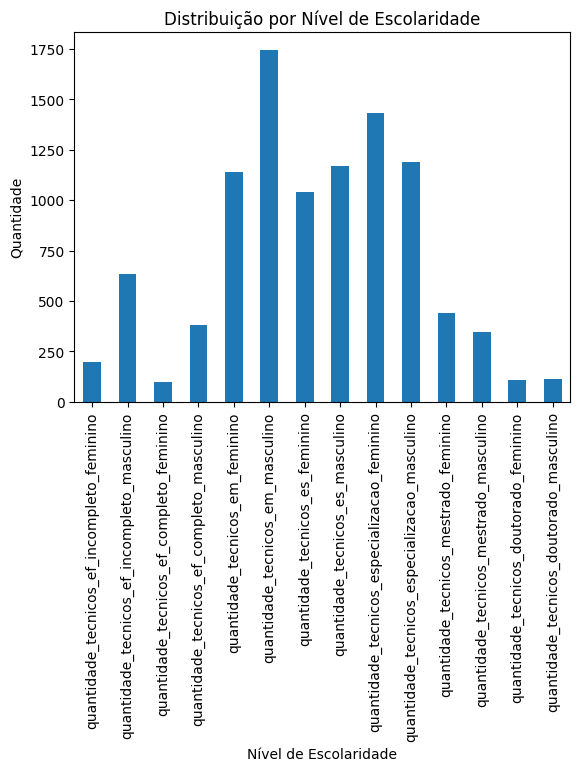

In [ ]:
colunas_escolaridade = [
    'quantidade_tecnicos_ef_incompleto_feminino', 'quantidade_tecnicos_ef_incompleto_masculino',
    'quantidade_tecnicos_ef_completo_feminino', 'quantidade_tecnicos_ef_completo_masculino',
    'quantidade_tecnicos_em_feminino', 'quantidade_tecnicos_em_masculino',
    'quantidade_tecnicos_es_feminino', 'quantidade_tecnicos_es_masculino',
    'quantidade_tecnicos_especializacao_feminino', 'quantidade_tecnicos_especializacao_masculino',
    'quantidade_tecnicos_mestrado_feminino', 'quantidade_tecnicos_mestrado_masculino',
    'quantidade_tecnicos_doutorado_feminino', 'quantidade_tecnicos_doutorado_masculino'
]

soma_escolaridade = ufpi_tecnicos[colunas_escolaridade].sum()
print(soma_escolaridade)

soma_escolaridade.plot(kind='bar', title='Distribuição por Nível de Escolaridade', xlabel='Nível de Escolaridade', ylabel='Quantidade', )

<Axes: title={'center': 'Proporção de Técnicos com Alta Escolaridade'}, xlabel='Ano', ylabel='Proporção'>

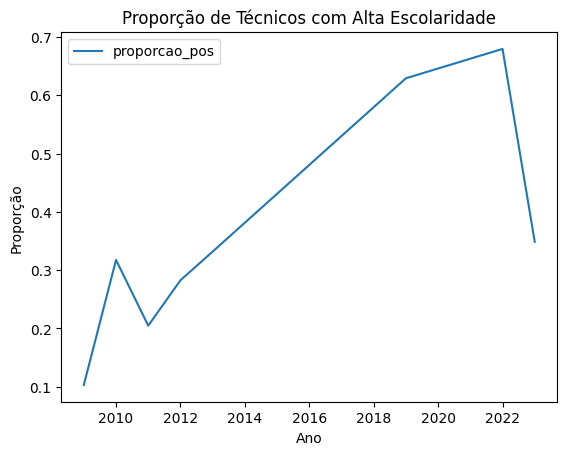

In [ ]:
tecnicos_pos = ['quantidade_tecnicos_especializacao_feminino', 'quantidade_tecnicos_especializacao_masculino',
                 'quantidade_tecnicos_mestrado_feminino', 'quantidade_tecnicos_mestrado_masculino',
                 'quantidade_tecnicos_doutorado_feminino', 'quantidade_tecnicos_doutorado_masculino']
ufpi_tecnicos['proporcao_pos'] = ufpi_tecnicos[tecnicos_pos].sum(axis=1) / ufpi_tecnicos['quantidade_tecnicos']
ufpi_tecnicos.plot(x='ano', y='proporcao_pos', kind='line', title='Proporção de Técnicos com Alta Escolaridade', xlabel='Ano', ylabel='Proporção')

In [ ]:
max_escolaridade = ufpi_tecnicos[colunas_escolaridade].max()
min_escolaridade = ufpi_tecnicos[colunas_escolaridade].min()

print("Máximos por escolaridade:\n", max_escolaridade)
print("Mínimos por escolaridade:\n", min_escolaridade)

Máximos por escolaridade:
 quantidade_tecnicos_ef_incompleto_feminino      128
quantidade_tecnicos_ef_incompleto_masculino     223
quantidade_tecnicos_ef_completo_feminino         58
quantidade_tecnicos_ef_completo_masculino        82
quantidade_tecnicos_em_feminino                 340
quantidade_tecnicos_em_masculino                508
quantidade_tecnicos_es_feminino                 205
quantidade_tecnicos_es_masculino                217
quantidade_tecnicos_especializacao_feminino     258
quantidade_tecnicos_especializacao_masculino    229
quantidade_tecnicos_mestrado_feminino           135
quantidade_tecnicos_mestrado_masculino           99
quantidade_tecnicos_doutorado_feminino           44
quantidade_tecnicos_doutorado_masculino          35
dtype: int64
Mínimos por escolaridade:
 quantidade_tecnicos_ef_incompleto_feminino       3
quantidade_tecnicos_ef_incompleto_masculino     15
quantidade_tecnicos_ef_completo_feminino         0
quantidade_tecnicos_ef_completo_masculino        6
q

### Análise dos dados por gênero

Média da proporção de técnicos femininos: 44.24%
Média da proporção de técnicos masculinos: 55.76%

Tabela Pivoteada - Proporção média de técnicos femininos e masculinos por ano:
      proporcao_feminino  proporcao_masculino
ano                                          
2009            0.422339             0.577661
2010            0.420866             0.579134
2011            0.419297             0.580703
2012            0.422899             0.577101
2013            0.423518             0.576482
2019            0.483600             0.516400
2022            0.494977             0.505023
2023            0.452073             0.547927


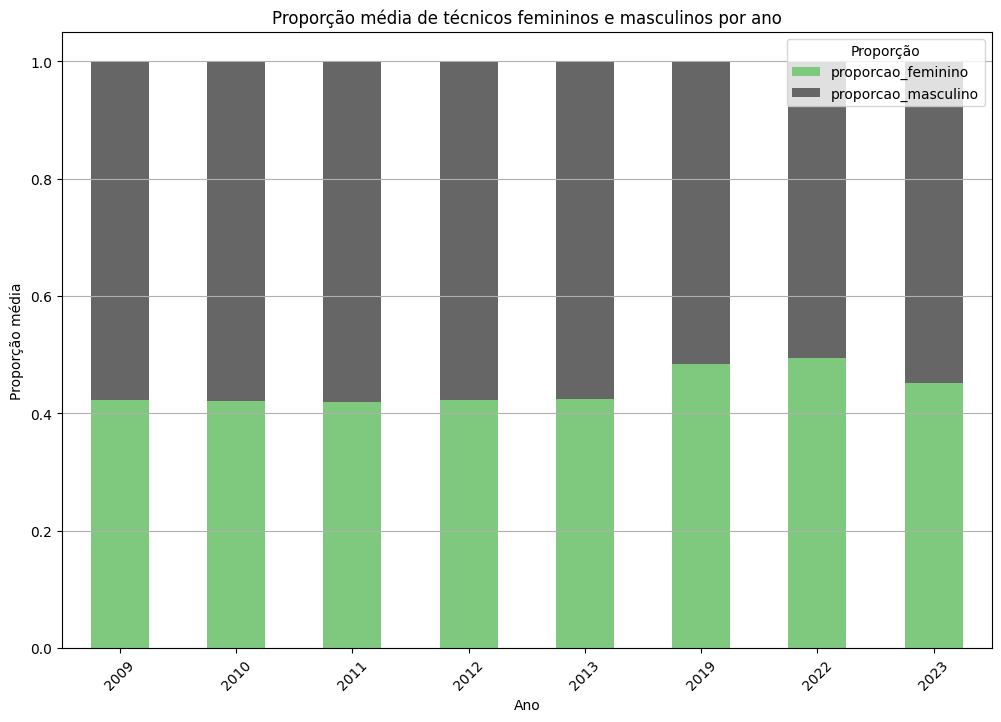

In [ ]:
ufpi_tecnicos['proporcao_feminino'] = ufpi_tecnicos.filter(like='_feminino').sum(axis=1) / ufpi_tecnicos['quantidade_tecnicos']
ufpi_tecnicos['proporcao_masculino'] = ufpi_tecnicos.filter(like='_masculino').sum(axis=1) / ufpi_tecnicos['quantidade_tecnicos']

media_proporcao_feminino = ufpi_tecnicos['proporcao_feminino'].mean()
media_proporcao_masculino = ufpi_tecnicos['proporcao_masculino'].mean()

print(f"Média da proporção de técnicos femininos: {media_proporcao_feminino:.2%}")
print(f"Média da proporção de técnicos masculinos: {media_proporcao_masculino:.2%}")

# Pivoteamento - proporção de técnicos por ano
pivot_proporcao_tecnicos = ufpi_tecnicos.pivot_table(index='ano',
                                                     values=['proporcao_feminino', 'proporcao_masculino'],
                                                     aggfunc='mean')

print("\nTabela Pivoteada - Proporção média de técnicos femininos e masculinos por ano:")
print(pivot_proporcao_tecnicos)

pivot_proporcao_tecnicos.plot(kind='bar', figsize=(12, 8), colormap='Accent', stacked=True)
plt.title('Proporção média de técnicos femininos e masculinos por ano')
plt.xlabel('Ano')
plt.ylabel('Proporção média')
plt.xticks(rotation=45)
plt.legend(title='Proporção')
plt.grid(axis='y')
plt.show()

Tabela pivoteada - Diferença de gênero por escolaridade:
Gênero          feminino  masculino
index                              
Doutorado            108        115
EF Completo          100        382
EF Incompleto        198        635
EM                  1141       1747
ES                  1039       1169
Especialização      1433       1189
Mestrado             438        348


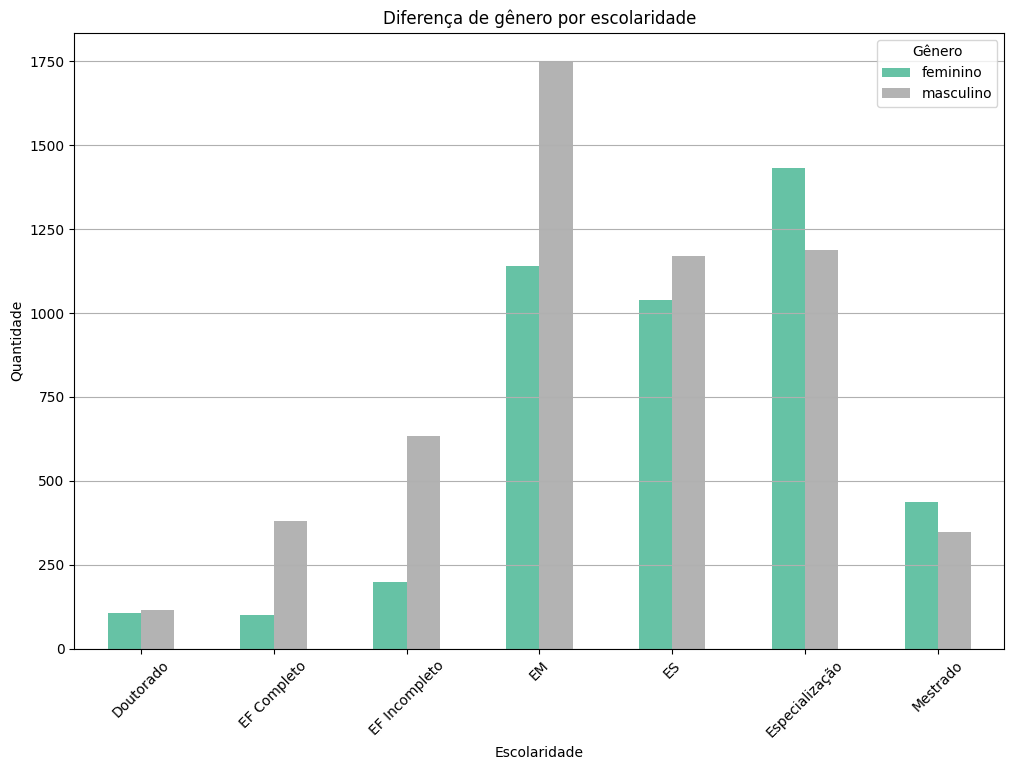

In [ ]:
genero_cols = ['feminino', 'masculino']
dados_genero = {
    'EF Incompleto': [ufpi_tecnicos['quantidade_tecnicos_ef_incompleto_feminino'].sum(),
                      ufpi_tecnicos['quantidade_tecnicos_ef_incompleto_masculino'].sum()],
    'EF Completo': [ufpi_tecnicos['quantidade_tecnicos_ef_completo_feminino'].sum(),
                    ufpi_tecnicos['quantidade_tecnicos_ef_completo_masculino'].sum()],
    'EM': [ufpi_tecnicos['quantidade_tecnicos_em_feminino'].sum(),
           ufpi_tecnicos['quantidade_tecnicos_em_masculino'].sum()],
    'ES': [ufpi_tecnicos['quantidade_tecnicos_es_feminino'].sum(),
           ufpi_tecnicos['quantidade_tecnicos_es_masculino'].sum()],
    'Especialização': [ufpi_tecnicos['quantidade_tecnicos_especializacao_feminino'].sum(),
                       ufpi_tecnicos['quantidade_tecnicos_especializacao_masculino'].sum()],
    'Mestrado': [ufpi_tecnicos['quantidade_tecnicos_mestrado_feminino'].sum(),
                 ufpi_tecnicos['quantidade_tecnicos_mestrado_masculino'].sum()],
    'Doutorado': [ufpi_tecnicos['quantidade_tecnicos_doutorado_feminino'].sum(),
                  ufpi_tecnicos['quantidade_tecnicos_doutorado_masculino'].sum()],
}

df_genero = pd.DataFrame(dados_genero, index=genero_cols).T

pivot_genero = df_genero.reset_index().melt(id_vars=['index'], var_name='Gênero', value_name='Quantidade')

pivot_table = pivot_genero.pivot_table(index='index', columns='Gênero', values='Quantidade', aggfunc='sum')

print("Tabela pivoteada - Diferença de gênero por escolaridade:")
print(pivot_table)

pivot_table.plot(kind='bar', figsize=(12, 8), colormap='Set2')
plt.title('Diferença de gênero por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.show()


Proporção de técnicos com alta escolaridade (feminino):
        ano  proporcao_alta_escolaridade_feminino
10148  2009                              0.138889
17465  2010                              0.432900
5242   2011                              0.287611
290    2012                              0.360179
15122  2013                              0.422633
14313  2019                              0.694056
3163   2022                              0.753247
9419   2023                              0.493228
Proporção de técnicos com alta escolaridade (masculino):
        ano  proporcao_alta_escolaridade_masculino
10148  2009                               0.091696
17465  2010                               0.275563
5242   2011                               0.170475
290    2012                               0.262206
15122  2013                               0.307116
14313  2019                               0.585977
3163   2022                               0.632959
9419   2023                  

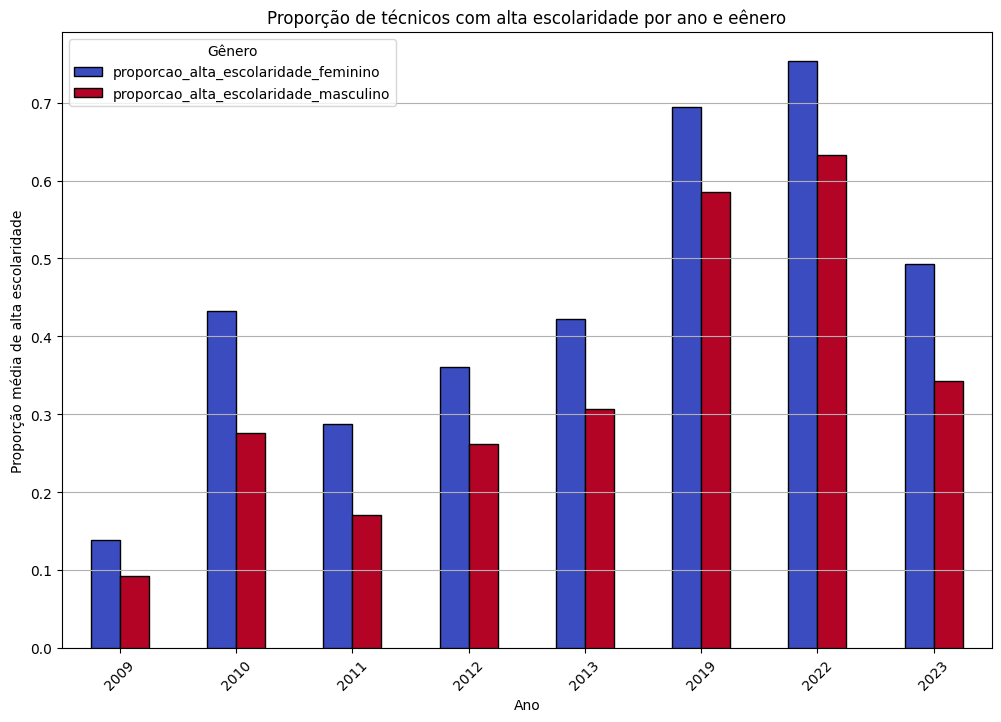

In [ ]:
# Calcular o total de técnicos (masculinos e femininos)
ufpi_tecnicos['total_tecnicos_feminino'] = ufpi_tecnicos[['quantidade_tecnicos_ef_completo_feminino',
                                                          'quantidade_tecnicos_em_feminino',
                                                          'quantidade_tecnicos_es_feminino',
                                                          'quantidade_tecnicos_especializacao_feminino',
                                                          'quantidade_tecnicos_mestrado_feminino',
                                                          'quantidade_tecnicos_doutorado_feminino']].sum(axis=1)

ufpi_tecnicos['total_tecnicos_masculino'] = ufpi_tecnicos[['quantidade_tecnicos_ef_completo_masculino',
                                                           'quantidade_tecnicos_em_masculino',
                                                           'quantidade_tecnicos_es_masculino',
                                                           'quantidade_tecnicos_especializacao_masculino',
                                                           'quantidade_tecnicos_mestrado_masculino',
                                                           'quantidade_tecnicos_doutorado_masculino']].sum(axis=1)

# Calcular o total de técnicos com alta escolaridade (especialização, mestrado e doutorado)
ufpi_tecnicos['alta_escolaridade_feminino'] = ufpi_tecnicos[['quantidade_tecnicos_especializacao_feminino',
                                                             'quantidade_tecnicos_mestrado_feminino',
                                                             'quantidade_tecnicos_doutorado_feminino']].sum(axis=1)

ufpi_tecnicos['alta_escolaridade_masculino'] = ufpi_tecnicos[['quantidade_tecnicos_especializacao_masculino',
                                                              'quantidade_tecnicos_mestrado_masculino',
                                                              'quantidade_tecnicos_doutorado_masculino']].sum(axis=1)

# Calcular a proporção de técnicos com alta escolaridade por gênero
ufpi_tecnicos['proporcao_alta_escolaridade_feminino'] = ufpi_tecnicos['alta_escolaridade_feminino'] / ufpi_tecnicos['total_tecnicos_feminino']
ufpi_tecnicos['proporcao_alta_escolaridade_masculino'] = ufpi_tecnicos['alta_escolaridade_masculino'] / ufpi_tecnicos['total_tecnicos_masculino']

print(f"Proporção de técnicos com alta escolaridade (feminino):\n{ufpi_tecnicos[['ano', 'proporcao_alta_escolaridade_feminino']]}")
print(f"Proporção de técnicos com alta escolaridade (masculino):\n{ufpi_tecnicos[['ano', 'proporcao_alta_escolaridade_masculino']]}")

pivot_alta_escolaridade = ufpi_tecnicos.pivot_table(index='ano',
                                                    values=['proporcao_alta_escolaridade_feminino',
                                                            'proporcao_alta_escolaridade_masculino'],
                                                    aggfunc='mean')

print("\nTabela pivoteada - Proporção de alta escolaridade por gênero e ano:")
print(pivot_alta_escolaridade)

pivot_alta_escolaridade.plot(kind='bar', figsize=(12, 8), colormap='coolwarm', edgecolor='black')
plt.title('Proporção de técnicos com alta escolaridade por ano e eênero')
plt.xlabel('Ano')
plt.ylabel('Proporção média de alta escolaridade')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.show()



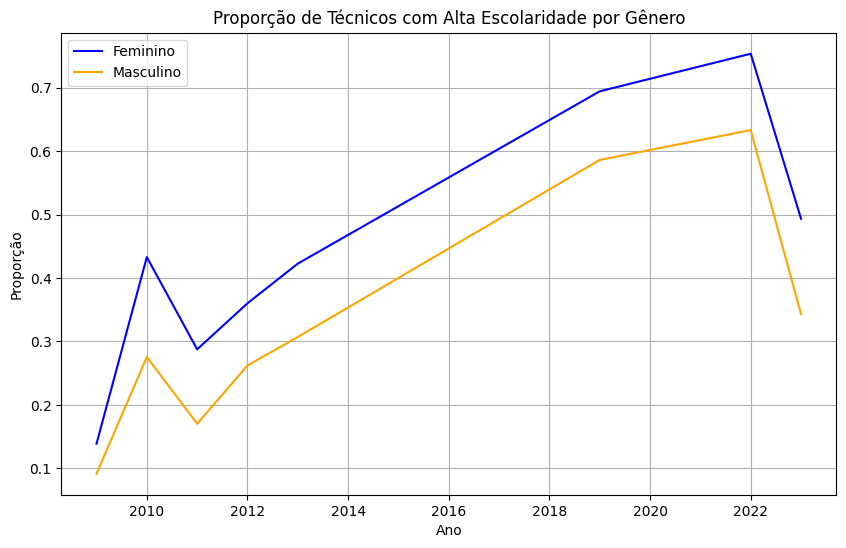

In [ ]:
plt.figure(figsize=(10, 6))

# Plotando a proporção de técnicos com alta escolaridade por gênero ao longo dos anos
plt.plot(ufpi_tecnicos['ano'], ufpi_tecnicos['proporcao_alta_escolaridade_feminino'], label='Feminino', color='blue')
plt.plot(ufpi_tecnicos['ano'], ufpi_tecnicos['proporcao_alta_escolaridade_masculino'], label='Masculino', color='orange')

plt.title("Proporção de Técnicos com Alta Escolaridade por Gênero")
plt.xlabel("Ano")
plt.ylabel("Proporção")
plt.legend()
plt.grid(True)
plt.show()

Identificação de padrões com regressão linear

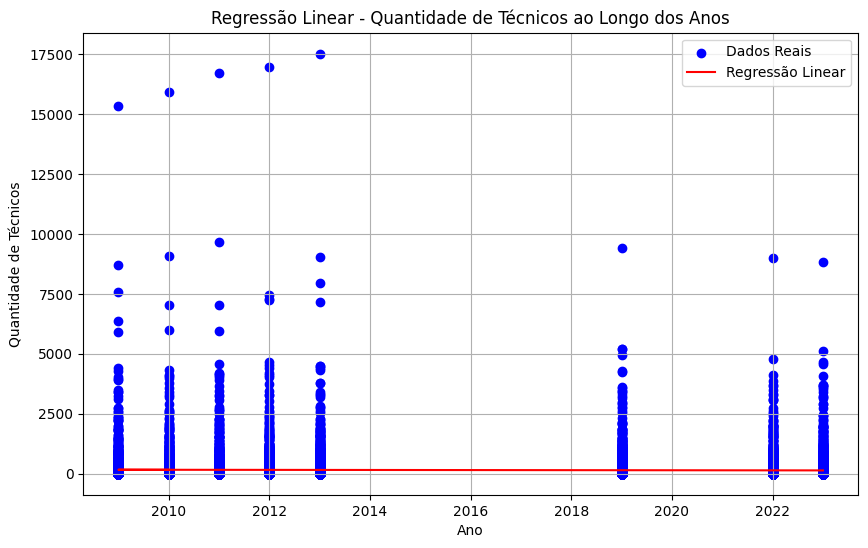

In [ ]:
X = df[['ano']]
y = df['quantidade_tecnicos']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Plotando os dados reais e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title("Regressão Linear - Quantidade de Técnicos ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Técnicos")
plt.legend()
plt.grid(True)
plt.show()